# Maximum de vraisemblance vs. Maximum de vraisemblance restreint

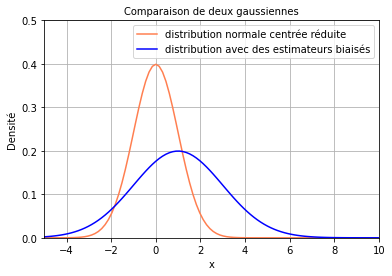

In [35]:
### Comparaison de deux gaussiennes (peut être utile)

from scipy.integrate import quad

import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


x_min = -5.0
x_max = 10

mean = 0 
std = 1.0

mean2 = 1.0
std2 = 2.0

x = np.linspace(x_min, x_max, 100)

y1 = scipy.stats.norm.pdf(x,mean,std)
y2 = scipy.stats.norm.pdf(x,mean2,std2)

plt.plot(x,y1, color='coral', label = 'distribution normale centrée réduite')
plt.plot(x,y2, color='blue', label = 'distribution avec des estimateurs biaisés')

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.5)

plt.title('Comparaison de deux gaussiennes',fontsize=10)

plt.legend()

plt.xlabel('x')
plt.ylabel('Densité')

plt.savefig("normal_distribution.png")
plt.show()

In [41]:
###  Création du jeu de données proposé dans l'article 

import pandas as pd
import numpy as np

data = np.array([[0, 10, 1], [1, 25, 1], [0, 3, 2], [1, 6, 2]])
df = pd.DataFrame(data, columns = ['Treat', 'Resp', 'Ind'])

df

,Treat,Resp,Ind
0,0,10,1
1,1,25,1
2,0,3,2
3,1,6,2


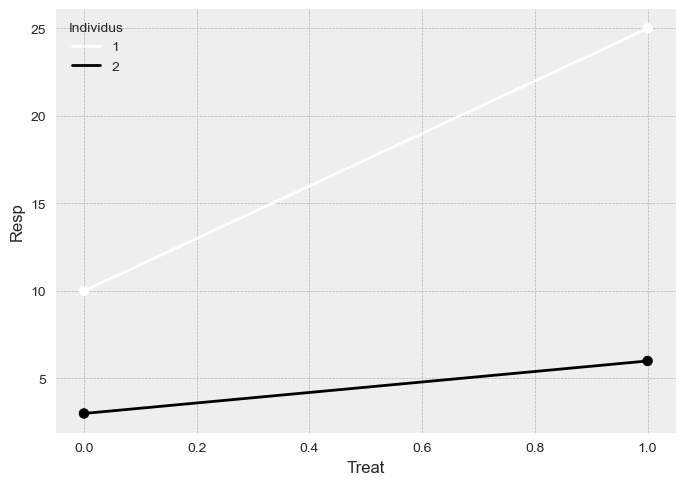

In [93]:
### représentation graphique du jeu de données proposé dans l'article 

import matplotlib.pyplot as plt

plt.style.use('bmh')
plt.scatter(df.Treat, df.Resp, c=df.Ind)
plt.plot(df.Treat.iloc[0:2], df.Resp.iloc[0:2], '-', c='white', label = '1')
plt.plot(df.Treat[2:4], df.Resp.iloc[2:4], '-', c='black', label='2')
plt.xlabel('Treat')
plt.ylabel('Resp')
plt.legend(title = 'Individus')

In [117]:
### modèle linéaire par régression des moindres carrés (OLS)

import patsy
patsy.__version__

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

results_ols = smf.ols('Resp ~ Treat', data=df).fit()
results_ols.summary()

C:\Users\megan\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Resp   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                 -0.075
Method:                 Least Squares   F-statistic:                    0.7902
Date:                Mon, 26 Oct 2020   Prob (F-statistic):              0.468
Time:                        18:15:20   Log-Likelihood:                -13.549
No. Observations:                   4   AIC:                             31.10
Df Residuals:                       2   BIC:                             29.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5000      7.159      0.908      0.460     -24.302      37.302
Treat          9.0000     10.124      0.889      0.468     -34.561      52.561
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.176
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.337
Skew:                           0.000   Prob(JB):                        0.845
Kurtosis:                       1.579   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
### Modèle Linéaire mixte par ML

model_mixte_ml = smf.mixedlm("Resp ~ Treat", df, groups = df['Ind'])
result_ml = mixed_random.fit(reml=False)
print(result_ml.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Resp    
No. Observations: 4       Method:             ML      
No. Groups:       2       Scale:              18.0001 
Min. group size:  2       Log-Likelihood:     -13.0029
Max. group size:  2       Converged:          Yes     
Mean group size:  2.0                                 
------------------------------------------------------
             Coef.  Std.Err.   z   P>|z| [0.025 0.975]
------------------------------------------------------
Intercept     6.500    5.062 1.284 0.199 -3.422 16.422
Treat         9.000    4.243 2.121 0.034  0.685 17.315
Group Var    33.250   14.083                          



In [118]:
### Modèle linéaire mixte par REML

model_mixte_reml = smf.mixedlm('Resp ~ Treat', data=df, groups = df['Ind'])
result_reml = model_mixte_reml.fit()
result_reml.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
        Mixed Linear Model Regression Results
=====================================================
Model:            MixedLM Dependent Variable: Resp   
No. Observations: 4       Method:             REML   
No. Groups:       2       Scale:              36.0000
Min. group size:  2       Log-Likelihood:     -7.8877
Max. group size:  2       Converged:          Yes    
Mean group size:  2.0                                
-----------------------------------------------------
            Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------
Intercept    6.500    7.159 0.908 0.364 -7.531 20.531
Treat        9.000    6.000 1.500 0.134 -2.760 20.760
Group Var   66.500   28.167                          
=====================================================

"""